***First load the folder in which there is data of your images of houses***

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist  # Replace with your dataset
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
house = r"C:\Users\Dell\Pictures\room_house_models\house"

In [12]:
# it is just to ensure that the folder is perfectly loaded
if os.path.exists(house):
    files_and_folders = os.listdir(house)
    print("Files and folders in 'house':")
    print(files_and_folders)
else:
    print(f"The folder at {house} does not exist.")

Files and folders in 'house':
['house.webp', 'house1.png', 'house10.png', 'house11.jfif', 'house12.png', 'house13.jfif', 'house14.jfif', 'house15.jfif', 'house16.jfif', 'house17.jfif', 'house18.jfif', 'house19.jfif', 'house2.png', 'house20.jfif', 'house21.jfif', 'house22.jfif', 'house23.jfif', 'house24.png', 'house25.jfif', 'house26.png', 'house27.jfif', 'house28.png', 'house29.jfif', 'house3.png', 'house30.jfif', 'house31.png', 'house32.jfif', 'house33.png', 'house34.png', 'house35.jfif', 'house36.jfif', 'house37.jfif', 'house38.jfif', 'house39.png', 'house4.png', 'house5.jpg', 'house6.jpeg', 'house7.jpeg', 'house8.png', 'house9.jfif', 'normalized_resized_house.webp', 'normalized_resized_house1.png', 'normalized_resized_house10.png']


***Now normalized the images in the folder like apply greyscale on them and also normalized pixel values***

In [15]:
# Listing all files in one folder
image_files = [f for f in os.listdir(house) if os.path.isfile(os.path.join(house, f))]

# Making the desired size for the resized images
desired_size = (256, 256)  

# Processing every image
for image_file in image_files:
    img_path = os.path.join(house, image_file)
    img = cv2.imread(img_path)

    if img is not None:
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(grayscale_img, desired_size, interpolation=cv2.INTER_AREA)
        normalized_img = resized_img / 255.0
        output_img = (normalized_img * 255).astype(np.uint8)
        output_path = os.path.join(house, f"normalized_resized_{os.path.splitext(image_file)[0]}.png")
        cv2.imwrite(output_path, output_img)


In [22]:
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    
    # Adjust the output units to match 64x64x1 = 4096
    model.add(Dense(64 * 64 * 1, activation='tanh'))
    model.add(Reshape((64, 64, 1)))  # Reshape to 64x64x1

    return model


***Now applying Generative Adversarial Network (GAN) to learn distribution of floor plans***

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.697884202003479 | D accuracy: 59.375] [G loss: [array(0.69485176, dtype=float32), array(0.69485176, dtype=float32), array(0.625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


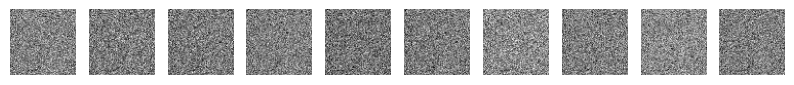

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

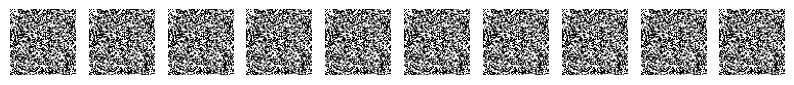

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [ ]:
# Loading and preprocessing the data
def load_data(path, image_size=(64, 64)):
    images = []
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size, color_mode='grayscale')
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 127.5 - 1.0 
        images.append(img)
    return np.array(images)

image_size = (64, 64)
data_path = house 
x_train = load_data(data_path, image_size)

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Dense(64 * 64 * 1, activation='tanh'))
    model.add(Reshape((64, 64, 1)))
    
    return model

def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(64, 64, 1), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
    discriminator.trainable = False
    
    gan_input = tf.keras.Input(shape=(100,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    
    gan = tf.keras.models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    
    return gan

def train_gan(gan, generator, discriminator, x_train, epochs=10000, batch_size=32, save_interval=1000):
    half_batch = int(batch_size / 2)
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        real_images = x_train[idx]
        
        noise = np.random.normal(0, 1, (half_batch, 100))
        generated_images = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        
        g_loss = gan.train_on_batch(noise, valid_y)
        
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
            save_images(generator, epoch)

def save_images(generator, epoch, image_size=(64, 64), examples=10):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    
    fig, axs = plt.subplots(1, examples, figsize=(10, 10))
    for i in range(examples):
        axs[i].imshow(generated_images[i].reshape(image_size), cmap='gray')
        axs[i].axis('off')
    plt.show()

generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

train_gan(gan, generator, discriminator, x_train, epochs=10000, batch_size=32, save_interval=1000)


***Trained model to generate new layouts based on user-provided dimension***

In [ ]:
def generate_layout(generator, width, height, labels):
    noise = np.random.normal(0, 1, (1, 100))
    generated_image = generator.predict(noise)
    generated_image = 0.5 * generated_image + 0.5
    generated_image = (generated_image * 255).astype(np.uint8)
    generated_image_resized = cv2.resize(generated_image[0], (width, height), interpolation=cv2.INTER_AREA)
    if generated_image_resized.shape[2] == 1:
        generated_image_resized = cv2.cvtColor(generated_image_resized, cv2.COLOR_GRAY2BGR)
    
    cv2.putText(generated_image_resized, f'{width} px', (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.putText(generated_image_resized, f'{height} px', (width - 70, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    for label, position in labels.items():
        cv2.putText(generated_image_resized, label, position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    plt.imshow(generated_image_resized)
    plt.axis('off')
    plt.show()

labels = {
    'Bed': (50, 50),
    'Table': (200, 200),
    'Bathroom': (300, 50)
}

generate_layout(generator, 128, 128, labels)


***Generate Layouts and saving them***

In [ ]:
def generate_layout(generator, width, height, rooms, save_path=None):

    noise = np.random.normal(0, 1, (1, 100))
    generated_image = generator.predict(noise)
    
    generated_image = 0.5 * generated_image + 0.5
    generated_image = (generated_image * 255).astype(np.uint8)
    
    generated_image_resized = cv2.resize(generated_image[0], (width, height), interpolation=cv2.INTER_AREA)
    
    if generated_image_resized.shape[2] == 1:
        generated_image_resized = cv2.cvtColor(generated_image_resized, cv2.COLOR_GRAY2BGR)
   
    for room in rooms:
        label = room.get('label', 'Room')
        x1, y1 = room.get('x1', 0), room.get('y1', 0)
        x2, y2 = room.get('x2', width), room.get('y2', height)
        
        cv2.rectangle(generated_image_resized, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(generated_image_resized, label, (x1 + 5, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    cv2.putText(generated_image_resized, f'{width} px', (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.putText(generated_image_resized, f'{height} px', (width - 70, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    image_pil = Image.fromarray(generated_image_resized)
    
    if save_path:
        image_pil.save(save_path)
        print(f"Layout saved to {save_path}")
    
    # Display the layout
    plt.imshow(generated_image_resized)
    plt.axis('off')
    plt.show()


***Chat bot interferance***

In [ ]:
def chatbot_interface(generator):
    print("Welcome to the House Layout Generator!")
    
    width = int(input("Enter the desired width of the house layout (in pixels): "))
    height = int(input("Enter the desired height of the house layout (in pixels): "))
    
    print("Please enter the details for each room in the house.")
    print("Type 'done' when you have finished entering rooms.")
    
    rooms = []
    while True:
        room_label = input("Enter the room label (or 'done' to finish): ")
        if room_label.lower() == 'done':
            break
        x1 = int(input(f"Enter the x1-coordinate for '{room_label}' (top-left corner): "))
        y1 = int(input(f"Enter the y1-coordinate for '{room_label}' (top-left corner): "))
        x2 = int(input(f"Enter the x2-coordinate for '{room_label}' (bottom-right corner): "))
        y2 = int(input(f"Enter the y2-coordinate for '{room_label}' (bottom-right corner): "))
        
        rooms.append({
            'label': room_label,
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2
        })
    
    save_option = input("Do you want to save the generated layout? (yes/no): ").strip().lower()
    save_path = None
    if save_option == 'yes':
        save_path = input("Enter the file path to save the layout (e.g., house_layout.png): ")
  
    generate_layout(generator, width, height, rooms, save_path)

chatbot_interface(generator)
